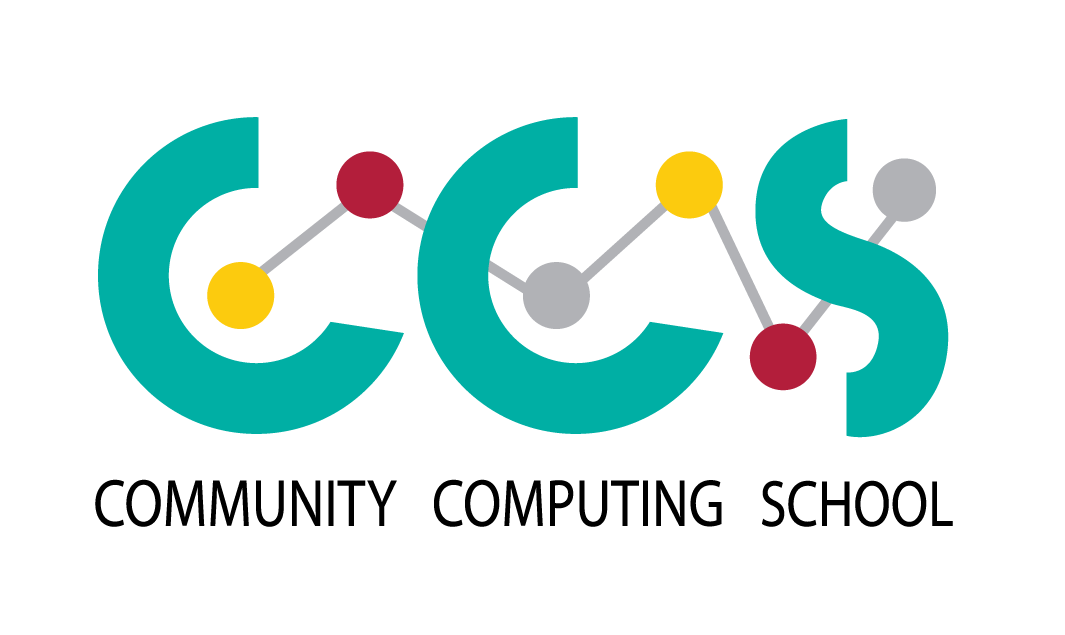

# Exploratory Data Analysis (EDA)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
import matplotlib.pylab as plt
import seaborn as sns

## Environment Variable Setting

In [2]:
#pd.set_option('display.width', 100)
pd.set_option('precision', 4)

## Load Dataset

In [3]:
missing_values = ["n/a", "na", "--", "?"]
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

* age: age in years
* sex (1 = male; 0 = female)
* cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
        
         simply attemp to distinguish presence (values 1,2,3,4) from absence (value 0)

In [4]:
df_disease = pd.read_csv('../DataSet/processed.cleveland.data.csv', na_values = missing_values, names=col_names)
df = pd.read_csv('../DataSet/heart_disease.csv', na_values = missing_values)

In [5]:
df_disease.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0

In [6]:
df_disease['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

num: simply attemp to distinguish presence (values 1,2,3,4) from absence (value 0)

In [7]:
#df_disease['thal'] = df_disease['thal'].map({3:'normal', 6:'fixed defect', 7:'reversable defect'})

In [8]:
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

In [9]:
#df_disease['num']=df_disease['num'].replace([2,3,4], 1)

In [10]:
#df_disease.to_csv('../DataSet/heart_disease.csv',index=False) 

In [11]:
df.shape

(303, 14)

## Descriptive Statistics 

### Peek at Your Data

In [12]:
df.head(5)

age     sex                cp  trestbps   chol    fbs  restecg  thalach  \
0  63.0    male    typical angina     145.0  233.0   True      2.0    150.0   
1  67.0    male      asymptomatic     160.0  286.0  False      2.0    108.0   
2  67.0    male      asymptomatic     120.0  229.0  False      2.0    129.0   
3  37.0    male  non-anginal pain     130.0  250.0  False      0.0    187.0   
4  41.0  female   atypical angina     130.0  204.0  False      2.0    172.0   

  exang  oldpeak        slope   ca               thal  num  
0    no      2.3  downsloping  0.0       fixed defect    0  
1   yes      1.5         flat  3.0             normal    1  
2   yes      2.6         flat  2.0  reversable defect    1  
3    no      3.5  downsloping  0.0             normal    0  
4    no      1.4    upsloping  0.0             normal    0

In [13]:
df.tail(5)

age     sex                cp  trestbps   chol    fbs  restecg  thalach  \
298  45.0    male    typical angina     110.0  264.0  False      0.0    132.0   
299  68.0    male      asymptomatic     144.0  193.0   True      0.0    141.0   
300  57.0    male      asymptomatic     130.0  131.0  False      0.0    115.0   
301  57.0  female   atypical angina     130.0  236.0  False      2.0    174.0   
302  38.0    male  non-anginal pain     138.0  175.0  False      0.0    173.0   

    exang  oldpeak      slope   ca               thal  num  
298    no      1.2       flat  0.0  reversable defect    1  
299    no      3.4       flat  2.0  reversable defect    1  
300   yes      1.2       flat  1.0  reversable defect    1  
301    no      0.0       flat  1.0             normal    1  
302    no      0.0  upsloping  NaN             normal    0

In [14]:
df.sample(20)

age     sex                cp  trestbps   chol    fbs  restecg  thalach  \
166  52.0    male  non-anginal pain     138.0  223.0  False      0.0    169.0   
79   58.0    male      asymptomatic     150.0  270.0  False      2.0    111.0   
32   64.0    male  non-anginal pain     140.0  335.0  False      0.0    158.0   
27   66.0  female    typical angina     150.0  226.0  False      0.0    114.0   
196  69.0    male    typical angina     160.0  234.0   True      2.0    131.0   
229  66.0    male      asymptomatic     112.0  212.0  False      2.0    132.0   
97   60.0  female      asymptomatic     150.0  258.0  False      2.0    157.0   
247  47.0    male      asymptomatic     110.0  275.0  False      2.0    118.0   
134  43.0  female  non-anginal pain     122.0  213.0  False      0.0    165.0   
289  56.0    male   atypical angina     120.0  240.0  False      0.0    169.0   
261  58.0  female   atypical angina     136.0  319.0   True      2.0    152.0   
128  44.0    male   atypical angina     120.0  220.0  False      0.0    170.0   
141  59.0    male    typical angina     170.0  288.0  False      2.0    159.0   
137  62.0    male   atypical angina     120.0  281.0  False      2.0    103.0   
44   61.0  female      asymptomatic     130.0  330.0  False      2.0    169.0   
246  58.0    male      asymptomatic     100.0  234.0  False      0.0    156.0   
123  55.0    male      asymptomatic     140.0  217.0  False      0.0    111.0   
143  64.0    male  non-anginal pain     125.0  309.0  False      0.0    131.0   
49   53.0    male  non-anginal pain     130.0  197.0   True      2.0    152.0   
175  57.0    male      asymptomatic     152.0  274.0  False      0.0     88.0   

    exang  oldpeak        slope   ca               thal  num  
166    no      0.0    upsloping  NaN             normal    0  
79    yes      0.8    upsloping  0.0  reversable defect    1  
32     no      0.0    upsloping  0.0             normal    1  
27     no      2.6  downsloping  0.0             normal    0  
196    no      0.1         flat  1.0             normal    0  
229   yes      0.1    upsloping  1.0             normal    1  
97     no      2.6         flat  2.0  reversable defect    1  
247   yes      1.0         flat  1.0             normal    1  
134    no      0.2         flat  0.0             normal    0  
289    no      0.0  downsloping  0.0             normal    0  
261    no      0.0    upsloping  2.0             normal    1  
128    no      0.0    upsloping  0.0             normal    0  
141    no      0.2         flat  0.0  reversable defect    1  
137    no      1.4         flat  1.0  reversable defect    1  
44     no      0.0    upsloping  0.0             normal    1  
246    no      0.1    upsloping  1.0  reversable defect    1  
123   yes      5.6  downsloping  0.0  reversable defect    1  
143   yes      1.8         flat  0.0  reversable defect    1  
49     no      1.2  downsloping  0.0             normal    0  
175   yes      1.2         flat  1.0  reversable defect    1

### Dimensions of Your Data

In [15]:
print(df.shape)

(303, 14)


### Data Type For Each Attribute

In [16]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg     float64
thalach     float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        299 non-null    float64
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: bool(1), float64(7), int64(1), object(5)
memory usage: 31.2+ KB


In [18]:
bool_col = df.select_dtypes(['bool']).columns
bool_col

Index(['fbs'], dtype='object')

In [19]:
object_col = df.select_dtypes(['object']).columns
object_col

Index(['sex', 'cp', 'exang', 'slope', 'thal'], dtype='object')

### Basic Statistics

In [31]:
df.describe()

age  trestbps      chol   restecg   thalach   oldpeak        ca  \
count  303.0000  303.0000  303.0000  303.0000  303.0000  303.0000  299.0000   
mean    54.4389  131.6898  246.6931    0.9901  149.6073    1.0396    0.6722   
std      9.0387   17.5997   51.7769    0.9950   22.8750    1.1611    0.9374   
min     29.0000   94.0000  126.0000    0.0000   71.0000    0.0000    0.0000   
25%     48.0000  120.0000  211.0000    0.0000  133.5000    0.0000    0.0000   
50%     56.0000  130.0000  241.0000    1.0000  153.0000    0.8000    0.0000   
75%     61.0000  140.0000  275.0000    2.0000  166.0000    1.6000    1.0000   
max     77.0000  200.0000  564.0000    2.0000  202.0000    6.2000    3.0000   

            num  
count  303.0000  
mean     0.4587  
std      0.4991  
min      0.0000  
25%      0.0000  
50%      0.0000  
75%      1.0000  
max      1.0000

In [21]:
df.describe(include="all").transpose()

count unique           top freq    mean     std  min    25%  50%  \
age        303    NaN           NaN  NaN   54.44   9.039   29     48   56   
sex        303      2          male  206     NaN     NaN  NaN    NaN  NaN   
cp         303      4  asymptomatic  144     NaN     NaN  NaN    NaN  NaN   
trestbps   303    NaN           NaN  NaN   131.7    17.6   94    120  130   
chol       303    NaN           NaN  NaN   246.7   51.78  126    211  241   
fbs        303      2         False  258     NaN     NaN  NaN    NaN  NaN   
restecg    303    NaN           NaN  NaN  0.9901   0.995    0      0    1   
thalach    303    NaN           NaN  NaN   149.6   22.88   71  133.5  153   
exang      303      2            no  204     NaN     NaN  NaN    NaN  NaN   
oldpeak    303    NaN           NaN  NaN    1.04   1.161    0      0  0.8   
slope      303      3     upsloping  142     NaN     NaN  NaN    NaN  NaN   
ca         299    NaN           NaN  NaN  0.6722  0.9374    0      0    0   
thal       301      3        normal  166     NaN     NaN  NaN    NaN  NaN   
num        303    NaN           NaN  NaN  0.4587  0.4991    0      0    0   

          75%  max  
age        61   77  
sex       NaN  NaN  
cp        NaN  NaN  
trestbps  140  200  
chol      275  564  
fbs       NaN  NaN  
restecg     2    2  
thalach   166  202  
exang     NaN  NaN  
oldpeak   1.6  6.2  
slope     NaN  NaN  
ca          1    3  
thal      NaN  NaN  
num         1    1

* Look at the unique values (for continuous this will show up as NaN). 
* If a feature has only 1 unique value it will not help to model, so discard it.
* Look at the ranges of the values. If the max or min of a feature is significantly different from the mean and from the 75% / 25%, then look into this further to understand if these values make sense in their context.

In [22]:
df.describe()["trestbps"]

count    303.0000
mean     131.6898
std       17.5997
min       94.0000
25%      120.0000
50%      130.0000
75%      140.0000
max      200.0000
Name: trestbps, dtype: float64

In [23]:
df.describe()["trestbps"]["75%"]

140.0

In [24]:
#data_fifa.describe(include="all").transpose()
numeric_columns = df.describe(percentiles=[.1, .25, .5, .75, .9],exclude='O').transpose()
numeric_columns

count unique    top freq    mean     std  min    10%    25%  50%  \
age        303    NaN    NaN  NaN   54.44   9.039   29     42     48   56   
trestbps   303    NaN    NaN  NaN   131.7    17.6   94    110    120  130   
chol       303    NaN    NaN  NaN   246.7   51.78  126  188.8    211  241   
fbs        303      2  False  258     NaN     NaN  NaN    NaN    NaN  NaN   
restecg    303    NaN    NaN  NaN  0.9901   0.995    0      0      0    1   
thalach    303    NaN    NaN  NaN   149.6   22.88   71    116  133.5  153   
oldpeak    303    NaN    NaN  NaN    1.04   1.161    0      0      0  0.8   
ca         299    NaN    NaN  NaN  0.6722  0.9374    0      0      0    0   
num        303    NaN    NaN  NaN  0.4587  0.4991    0      0      0    0   

          75%    90%  max  
age        61     66   77  
trestbps  140    152  200  
chol      275  308.8  564  
fbs       NaN    NaN  NaN  
restecg     2      2    2  
thalach   166  176.6  202  
oldpeak   1.6    2.8  6.2  
ca          1      2    3  
num         1      1    1

* There are Eight (8) Continuous Variables.
* Look at the ranges of the values. If the max or min of a feature is significantly different from the mean and from the 75% / 25%, then look into this further to understand if these values make sense in their context.

In [25]:
numeric_features = numeric_columns.index.to_list()
numeric_features

['age',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'oldpeak',
 'ca',
 'num']

In [26]:
categorical_columns = df.describe(include='O').transpose()
categorical_columns

count unique           top freq
sex     303      2          male  206
cp      303      4  asymptomatic  144
exang   303      2            no  204
slope   303      3     upsloping  142
thal    301      3        normal  166

* There are Five (5) Categorical Features.
* unique: If a feature has only 1 unique value it will not help to model, so discard it.
* top: Most commonly occuring value among all values in a column. 
* freq: Frequency (or count of occurance) of most commonly occuring value among all values in a column. 

In [32]:
categorical_features = categorical_columns.index.to_list()
categorical_features

['sex', 'cp', 'exang', 'slope', 'thal']

In [33]:
categorical_features.append("fbs")

ca: number of major vessels (0-3) colored by flourosopy

In [34]:
df["ca"].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [35]:
ordinal_features = ["ca"]

In [36]:
df["restecg"].value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [37]:
categorical_features.append("restecg")

In [38]:
categorical_features

['sex', 'cp', 'exang', 'slope', 'thal', 'fbs', 'restecg']

In [39]:
ordinal_features

['ca']

In [40]:
numeric_features

['age',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'oldpeak',
 'ca',
 'num']

In [41]:
numeric_features.remove("fbs")
numeric_features.remove("ca")
numeric_features.remove("restecg")
numeric_features.remove("num")

In [42]:
numeric_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Duplicate Rows

In [28]:
df.duplicated().sum()

0

No duplicate rows are present in the data

### Missing Values 

In [29]:
df.isna().sum().sum()

6

In [30]:
df.isna().sum().sum()

6

In [320]:
null_columns = {}

all_columns = df.isnull().sum().sort_values(ascending=False)
for item in all_columns.index:
    if all_columns[item] > 0:
        null_columns[item] = 100* all_columns[item]/len(df)
        
null_columns

{'ca': 1.3201320132013201, 'thal': 0.6600660066006601}

### Minimum = 0, in Numeric Column

In [321]:
statistics = df.describe()
min_value_zero_columns = [item for item in statistics if statistics[item]['min'] == 0]
min_value_zero_columns

['restecg', 'oldpeak', 'ca', 'num']

### Class Distribution (Classification Only)

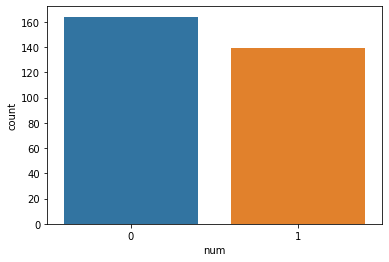

In [322]:
sns.countplot(x='num',data=df);

There are nearly double the number of observations with class 0 (no onset of diabetes) than there are with class 1 (onset of diabetes).

In [323]:
df['num'].value_counts().size

2

In [324]:
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

* 0 ->   164  [Majority/Negative Class]
* 1 ->   139  [Minority/Positive Class]

#### Weight Calculation

weight = total negative examples/total positive examples

In [325]:
def calculate_weight():
    y = df['num']
    counter = Counter(y)
    for k,v in counter.items():
        per = v / len(y) * 100
        print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    weight = counter[0] / counter[1]
    return weight

In [326]:
weight = calculate_weight()
print(weight)

Class=0, Count=164, Percentage=54.125%
Class=1, Count=139, Percentage=45.875%
1.1798561151079137


* Most of the contemporary works in class imbalance concentrate on imbalance ratios ranging from 1:4 up to 1:100.

## Distributions

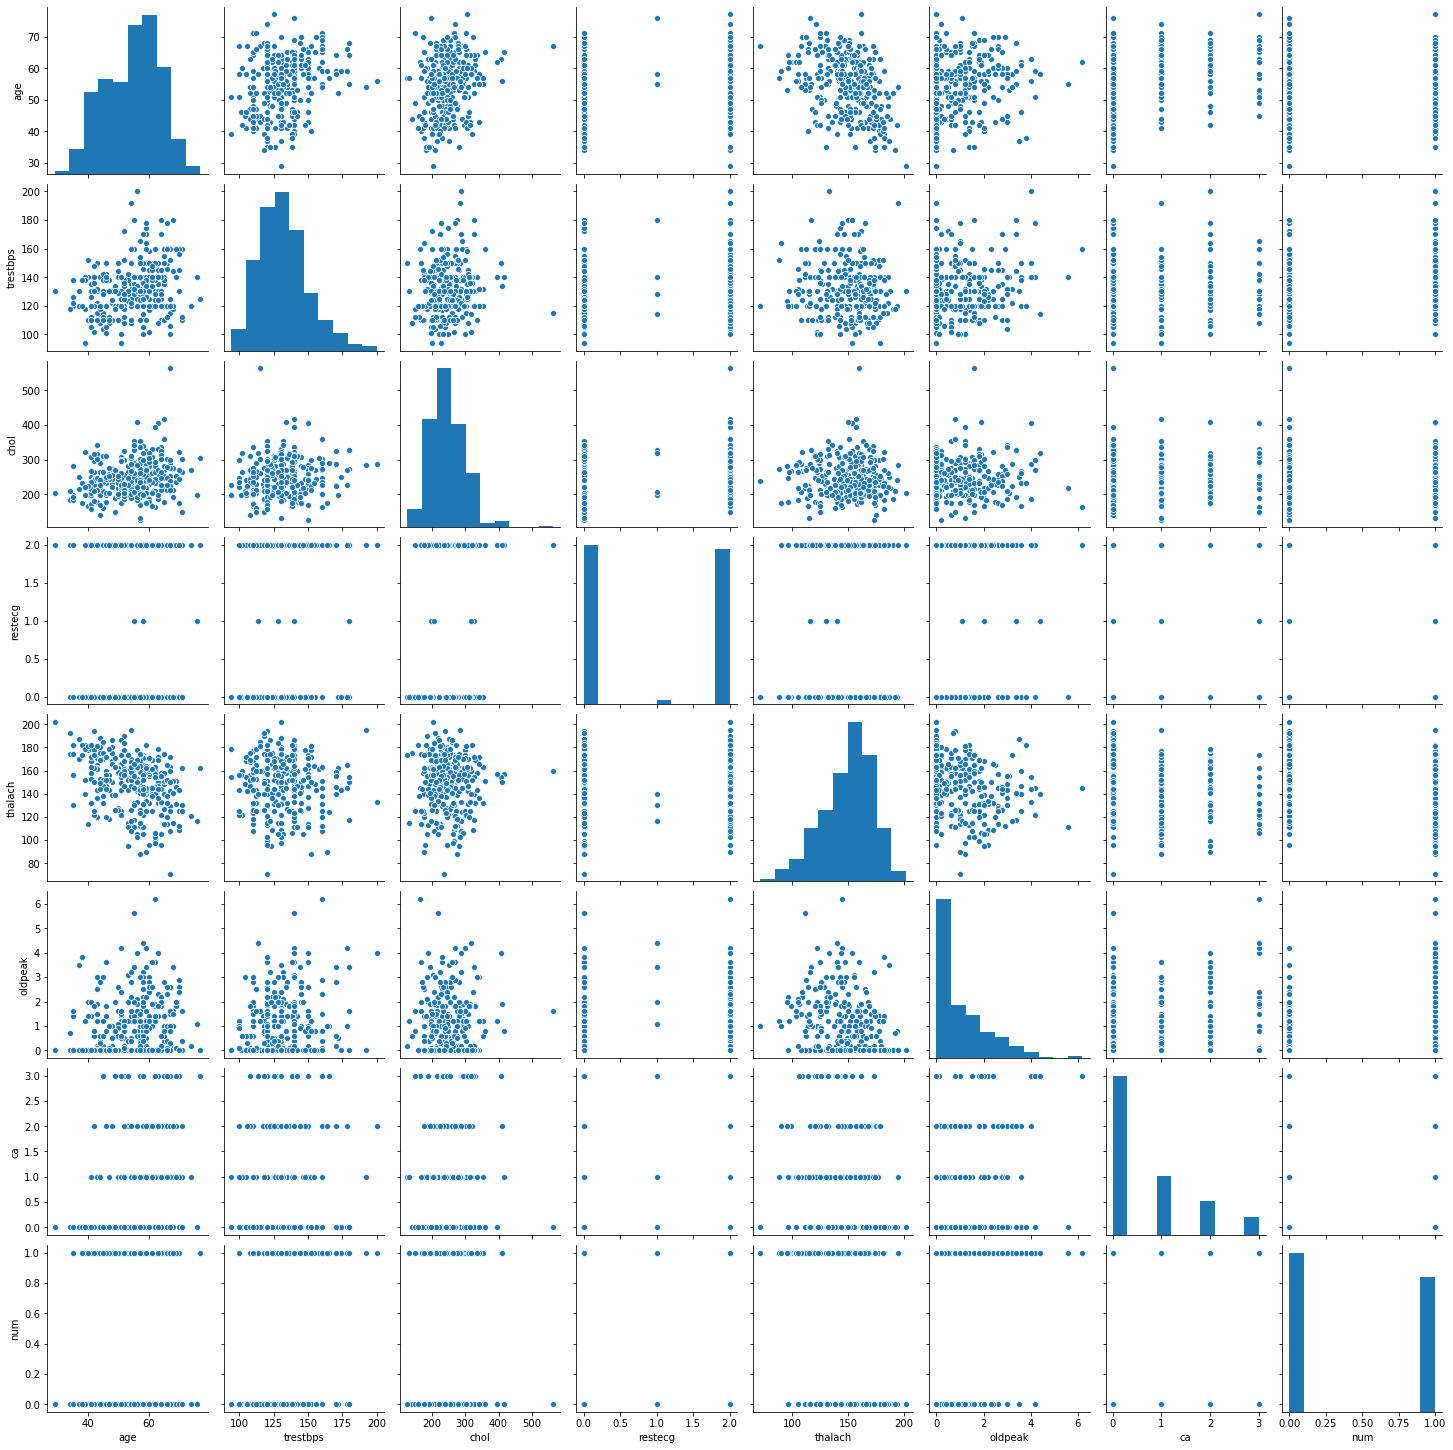

In [329]:
#plt.figure(figsize=(12,6))
sns.pairplot(df.drop('fbs', axis=1));

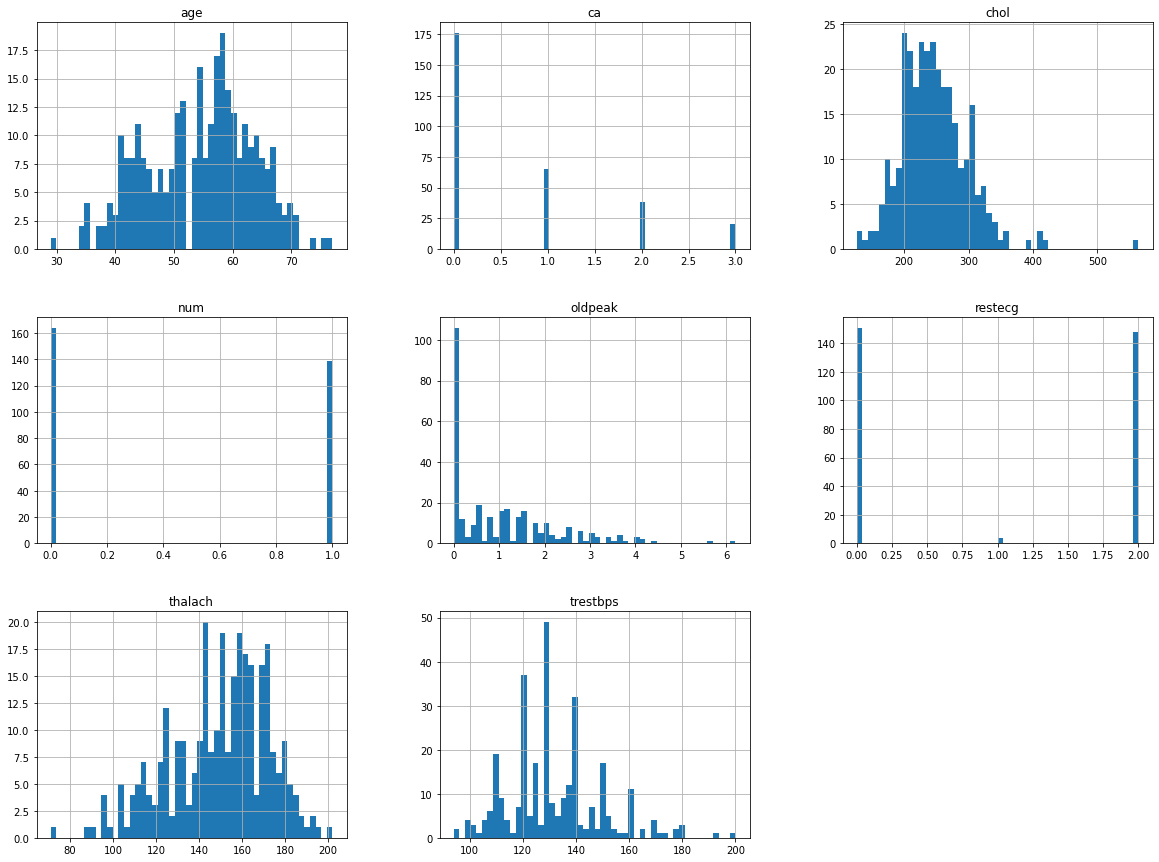

In [331]:
df.drop('fbs', axis=1).hist(bins=50, figsize=(20,15));

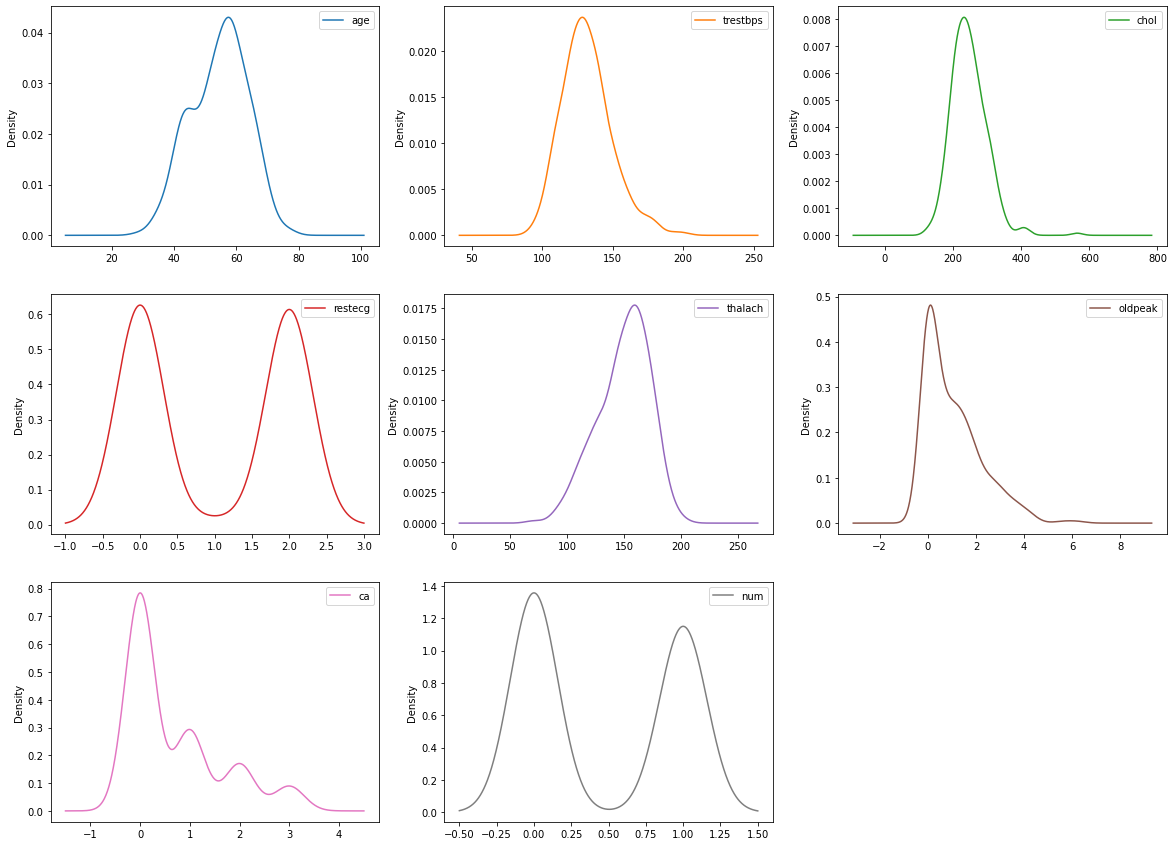

In [332]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20,15));

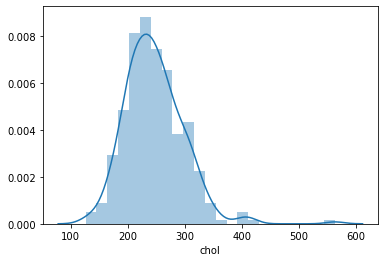

In [334]:
sns.distplot(df['chol']);

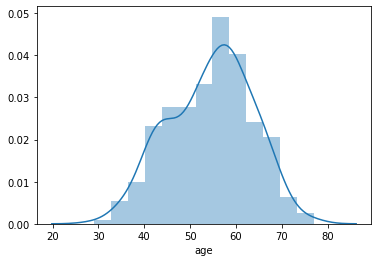

In [337]:
sns.distplot(df['age']);

#### Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models.

In [338]:
skew = df.skew()
print(skew)

age        -0.2091
trestbps    0.7060
chol        1.1355
fbs         1.9867
restecg     0.0199
thalach    -0.5374
oldpeak     1.2697
ca          1.1894
num         0.1664
dtype: float64


The skew results show a positive (right) or negative (left) skew. Values closer to zero show less skew.

## Outliers

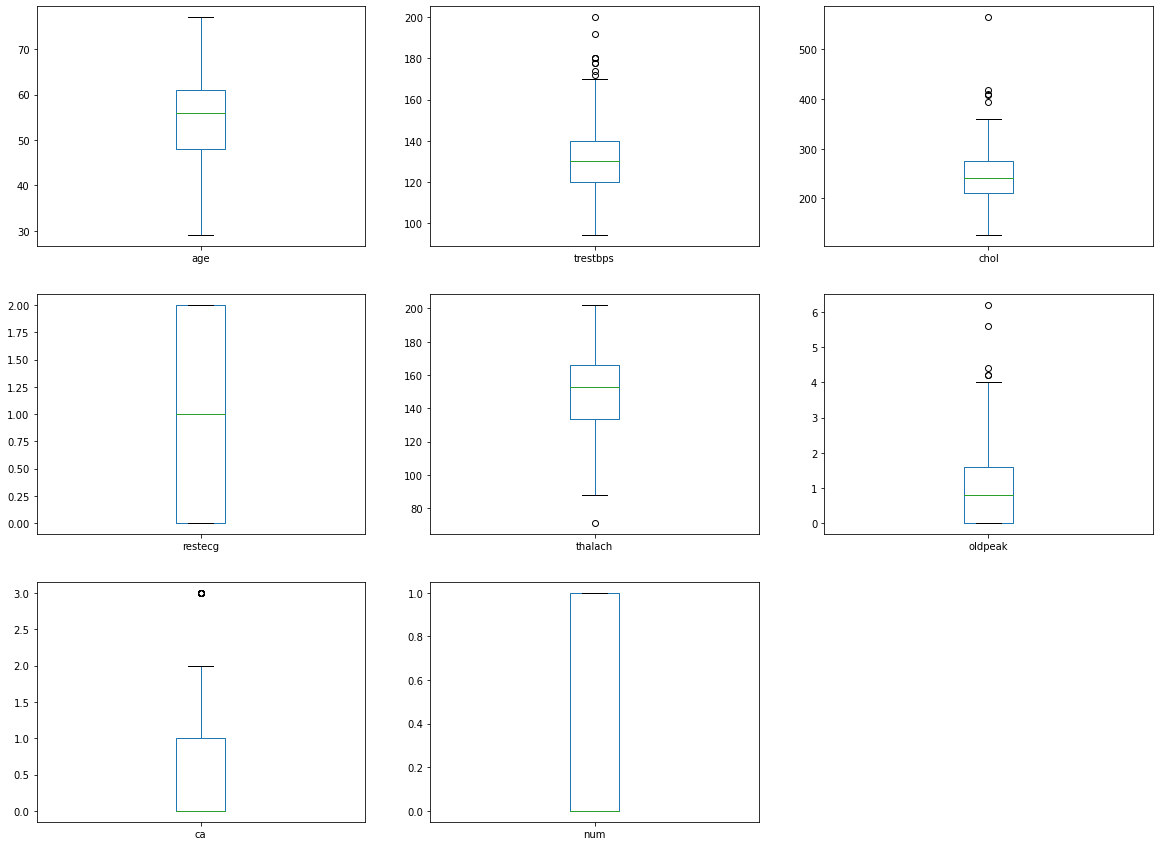

In [339]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15));

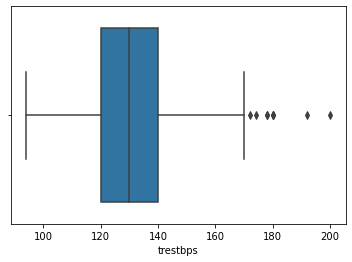

In [340]:
#plt.figure(figsize=(20,15));
sns.boxplot(x='trestbps', data=df);

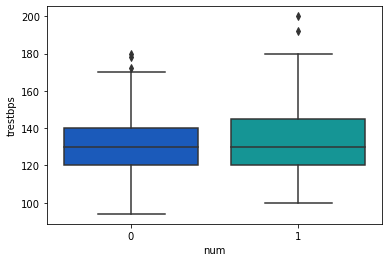

In [341]:
sns.boxplot(y="trestbps", x='num', data=df, palette='winter');

## Correlation

**Degree of correlation:**
1.	**Perfect:** If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
2.	**High degree:** If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
3.	**Moderate degree:** If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
4.	**Low degree:** When the value lies below + .29, then it is said to be a small correlation.
5.	**No correlation:** When the value is zero.

In [342]:
# calculate correlation matrix
corr = df.corr()

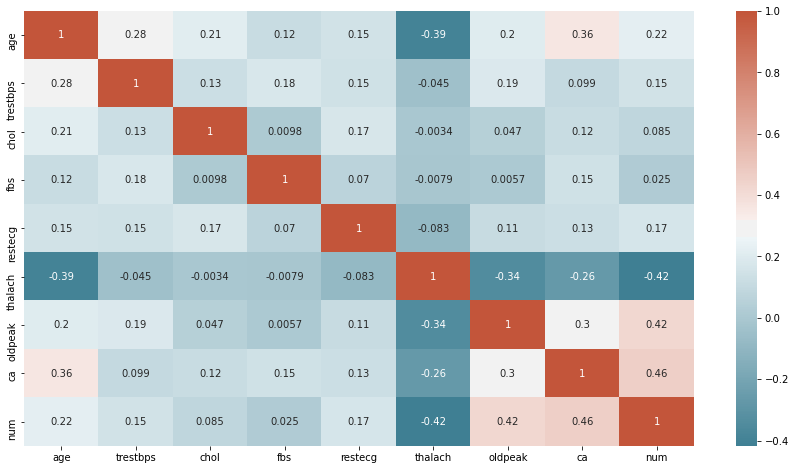

In [343]:
# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True)); #cmap='viridis'

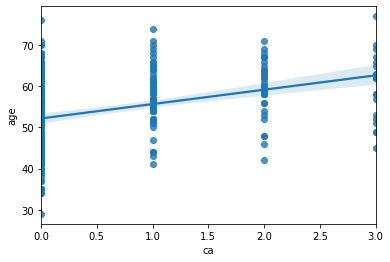

In [344]:
sns.regplot(x="ca", y="age", data=df);

In [345]:
corr

age  trestbps    chol     fbs  restecg  thalach  oldpeak      ca  \
age       1.0000    0.2849  0.2090  0.1185   0.1489  -0.3938   0.2038  0.3626   
trestbps  0.2849    1.0000  0.1301  0.1753   0.1466  -0.0454   0.1892  0.0988   
chol      0.2090    0.1301  1.0000  0.0098   0.1710  -0.0034   0.0466  0.1190   
fbs       0.1185    0.1753  0.0098  1.0000   0.0696  -0.0079   0.0057  0.1455   
restecg   0.1489    0.1466  0.1710  0.0696   1.0000  -0.0834   0.1141  0.1283   
thalach  -0.3938   -0.0454 -0.0034 -0.0079  -0.0834   1.0000  -0.3431 -0.2642   
oldpeak   0.2038    0.1892  0.0466  0.0057   0.1141  -0.3431   1.0000  0.2958   
ca        0.3626    0.0988  0.1190  0.1455   0.1283  -0.2642   0.2958  1.0000   
num       0.2231    0.1508  0.0852  0.0253   0.1692  -0.4172   0.4245  0.4604   

             num  
age       0.2231  
trestbps  0.1508  
chol      0.0852  
fbs       0.0253  
restecg   0.1692  
thalach  -0.4172  
oldpeak   0.4245  
ca        0.4604  
num       1.0000

In [346]:
df.corr()['num'].sort_values(ascending=False).drop('num')

ca          0.4604
oldpeak     0.4245
age         0.2231
restecg     0.1692
trestbps    0.1508
chol        0.0852
fbs         0.0253
thalach    -0.4172
Name: num, dtype: float64

In [347]:
pearson_coef, p_value = stats.pearsonr(df['age'], df['num'])
print(pearson_coef)
print(p_value)

0.2231202946904515
8.95563691752952e-05


In [349]:
pearson_coef, p_value = stats.pearsonr(df['age'], df['fbs'])
print(pearson_coef)
print(p_value)

0.11853024221696312
0.03920869542219147


## Pandas Profiling

In [350]:
from pandas_profiling import ProfileReport

In [351]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [352]:
profile.to_file("heart_disease_pandas_profiling.html")

In [353]:
profile.to_notebook_iframe()

## Sweetviz Profiling

In [354]:
import sweetviz as sv

In [355]:
my_report = sv.analyze(df)
my_report.show_html('heart_disease_sv_profiling.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report heart_disease_sv_profiling.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



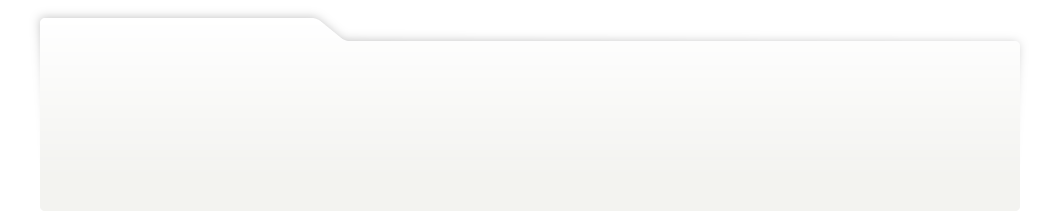
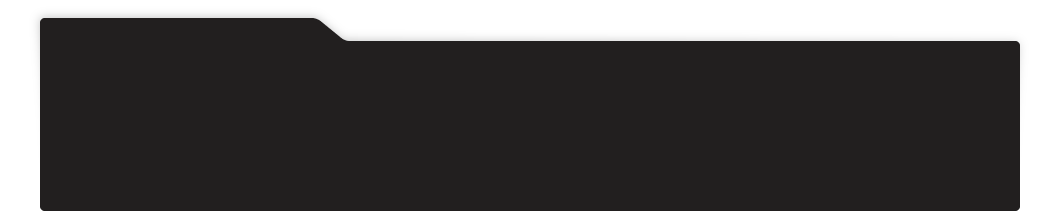
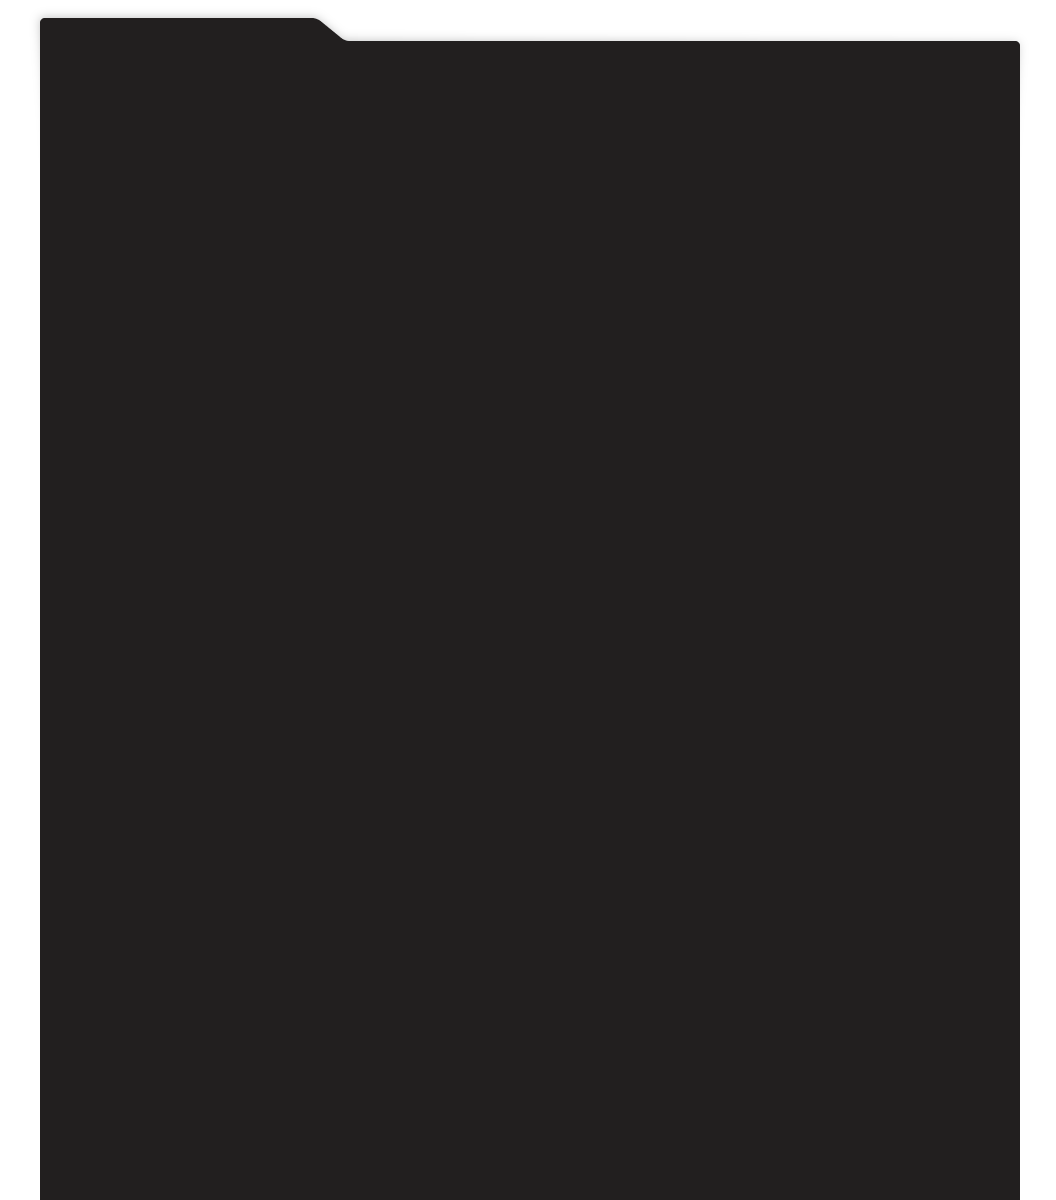
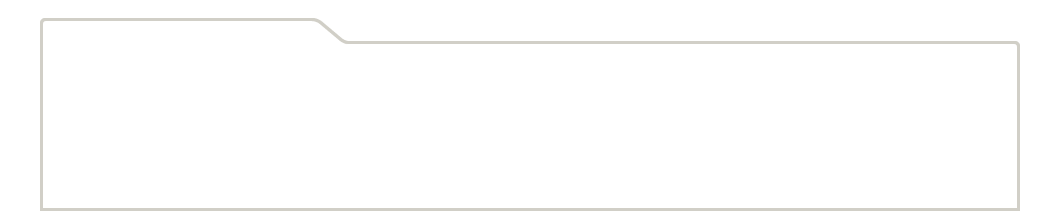
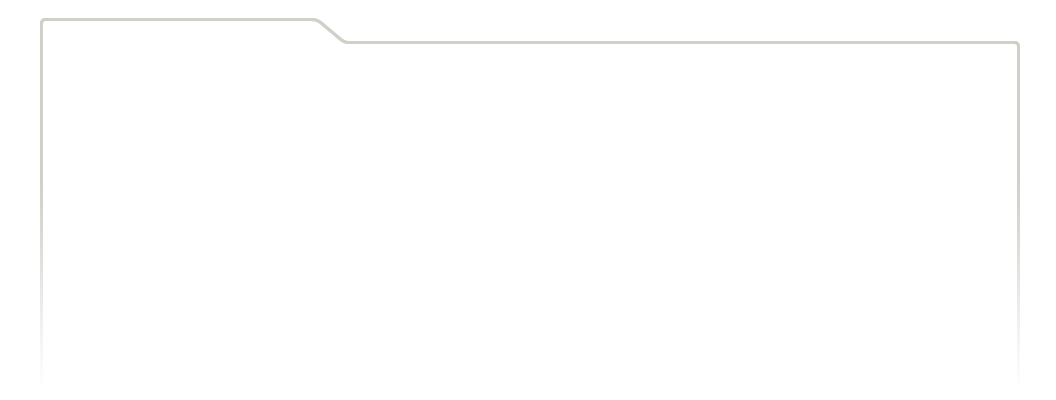
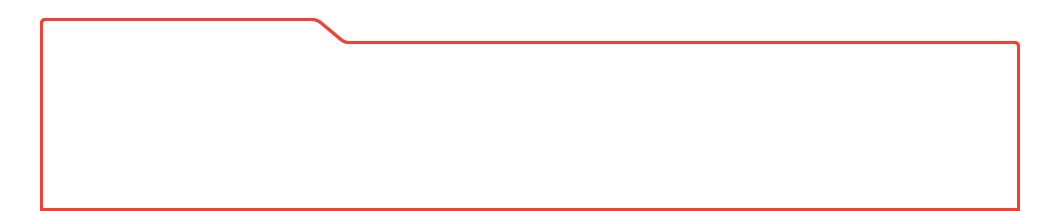
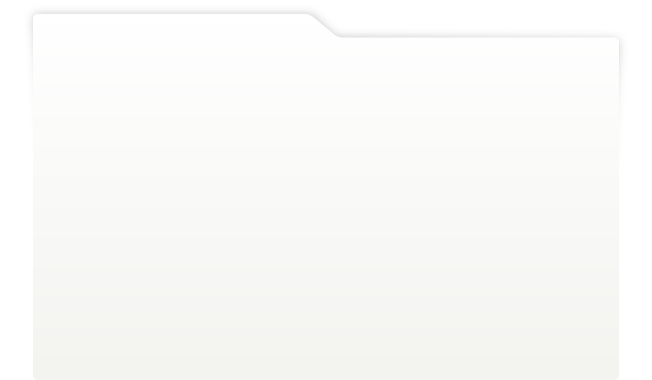
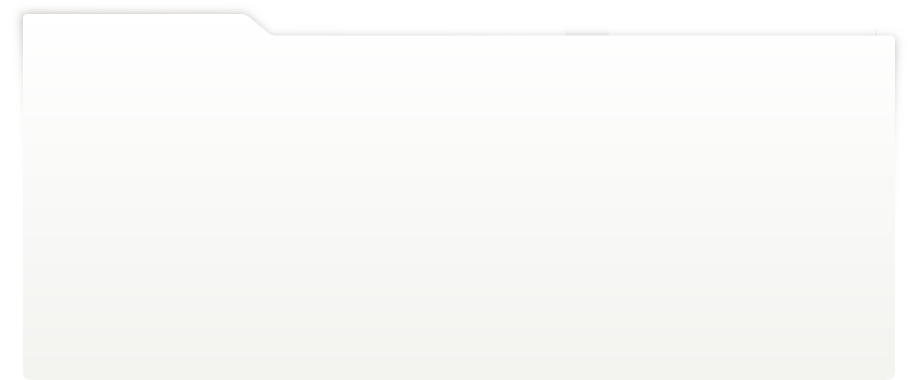
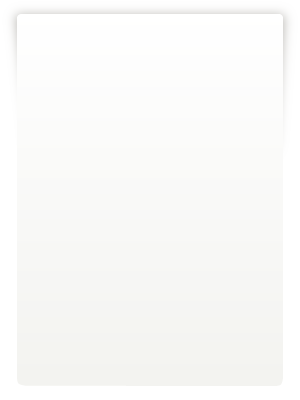
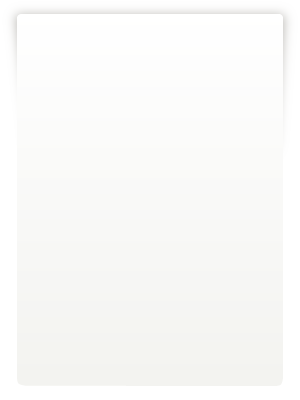
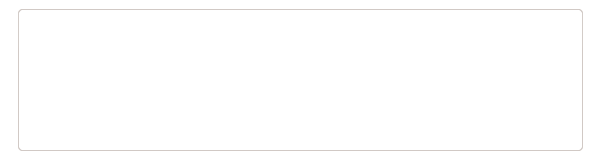
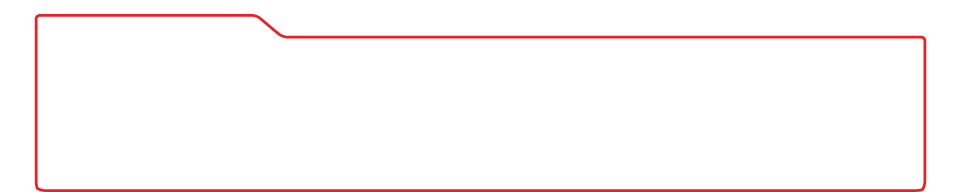
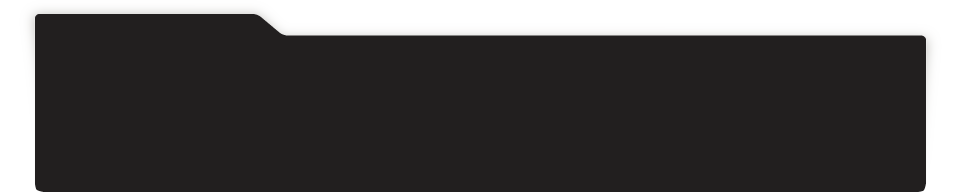
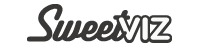
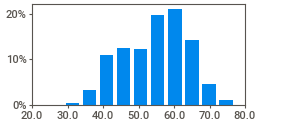
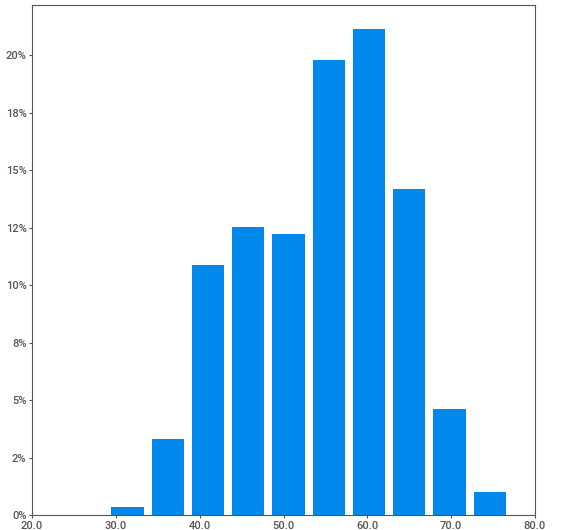
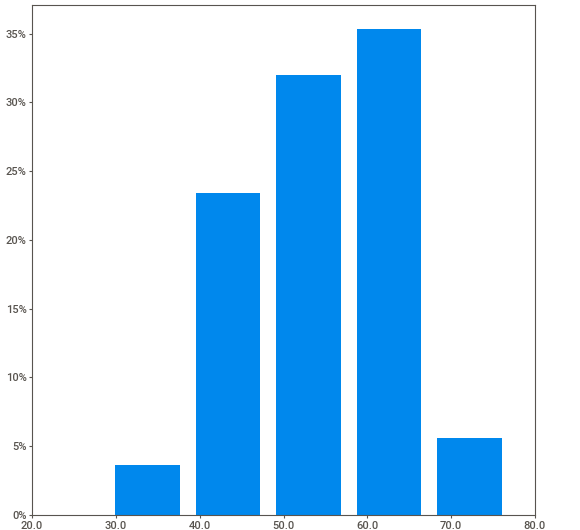
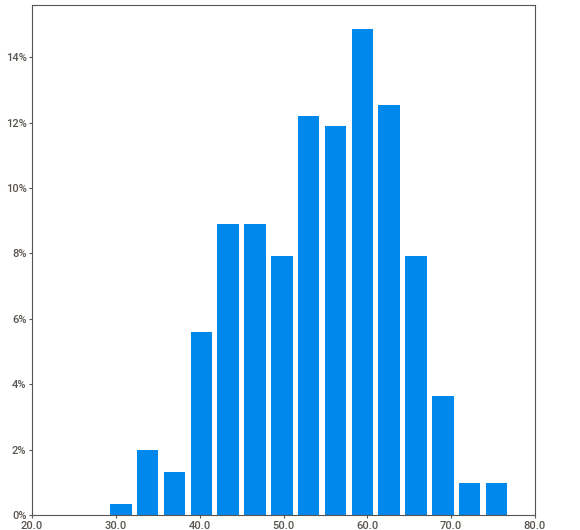
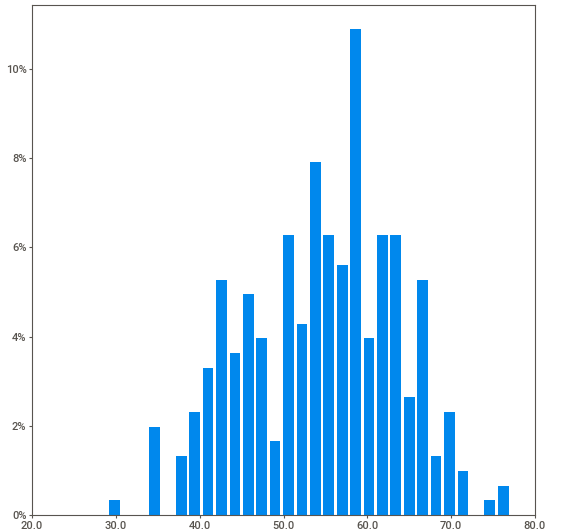
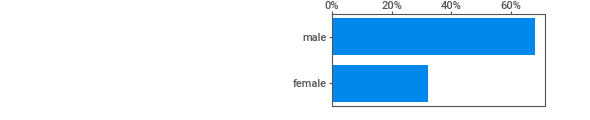
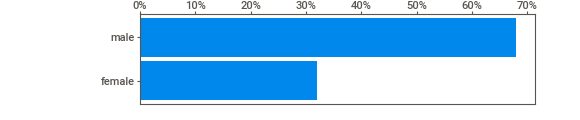
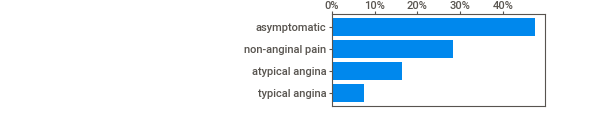
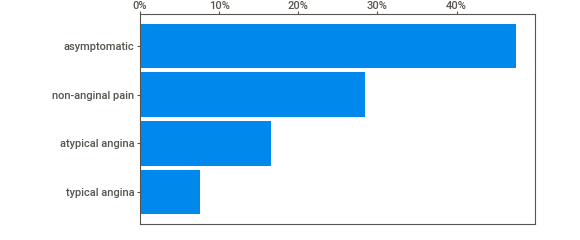
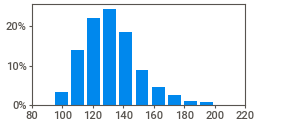
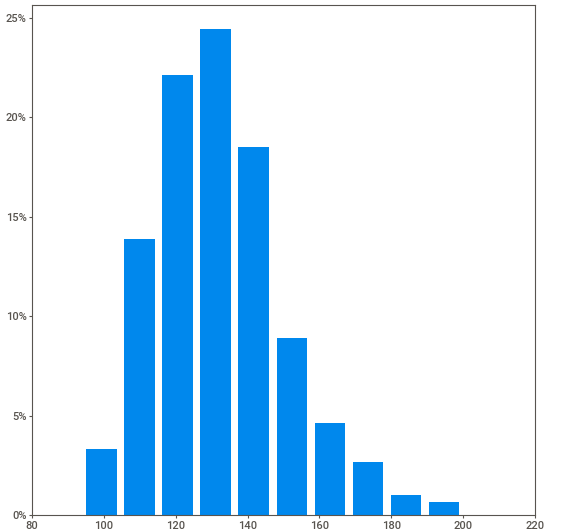
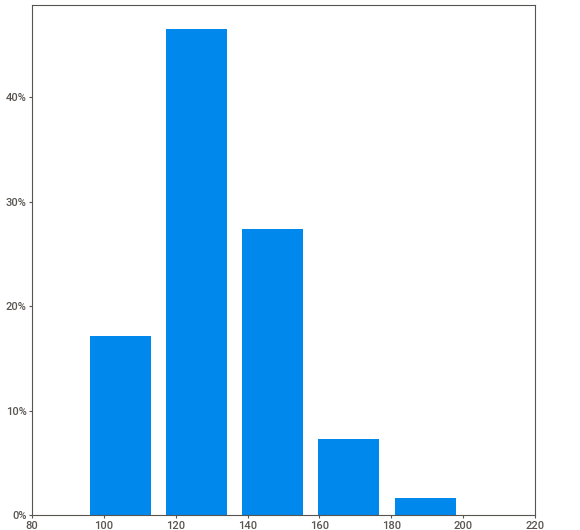
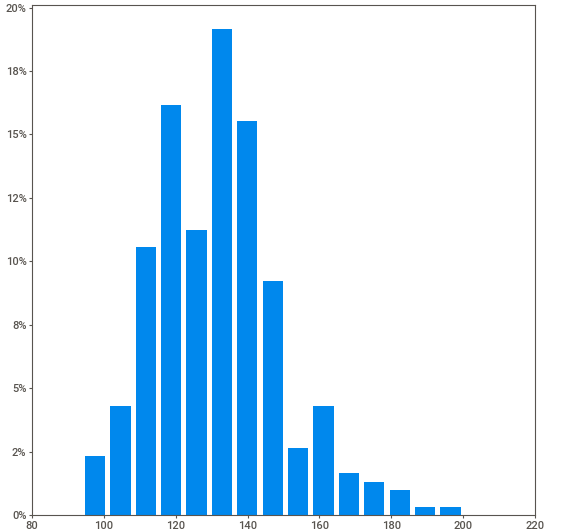
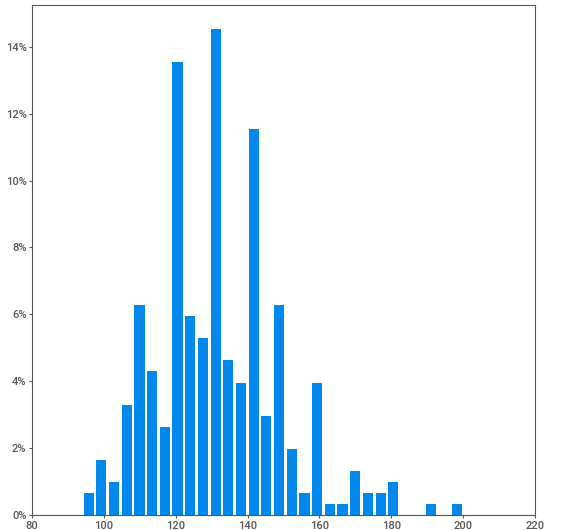
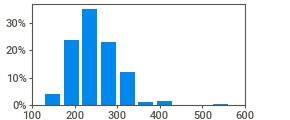
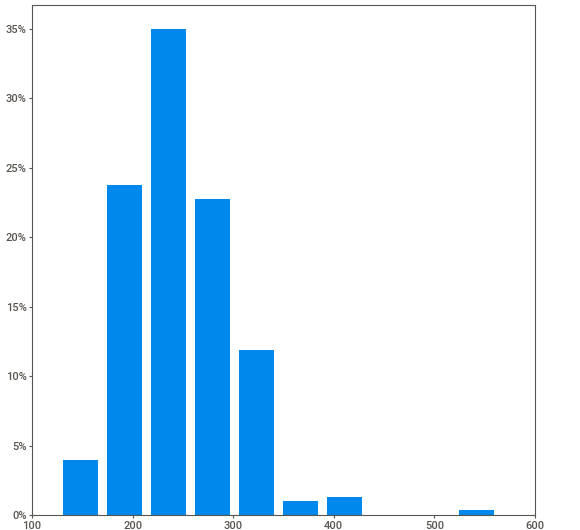
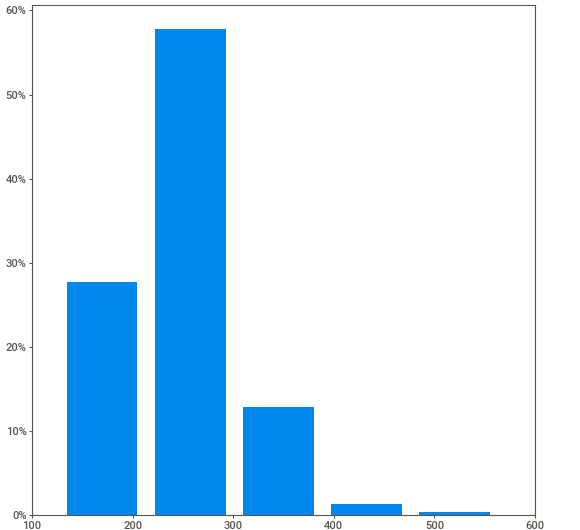
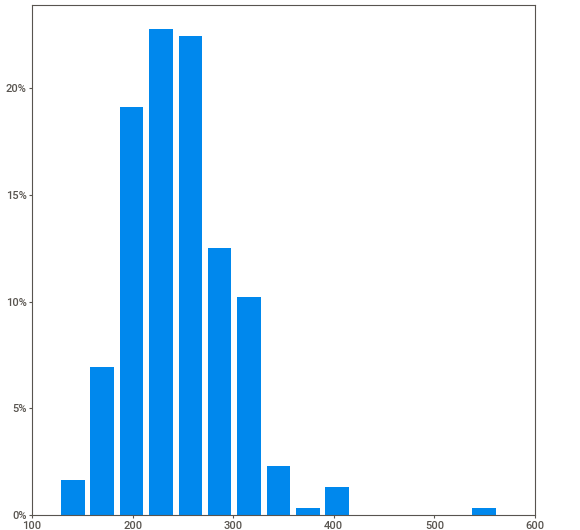
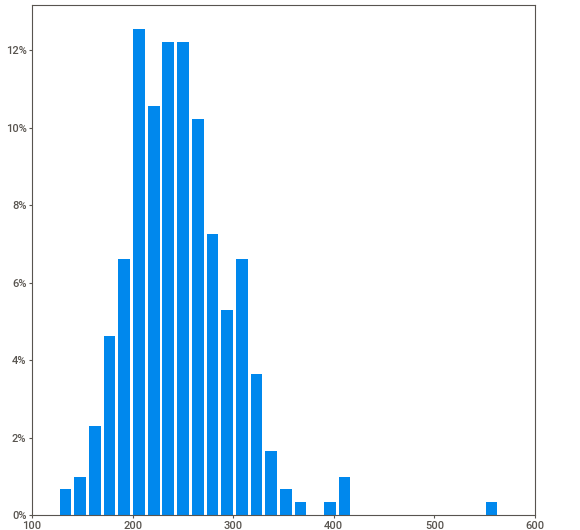
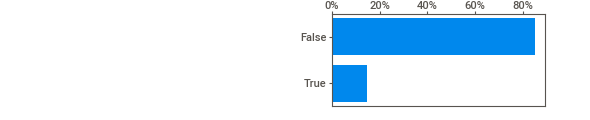
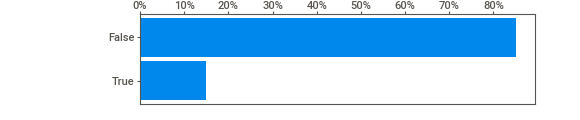
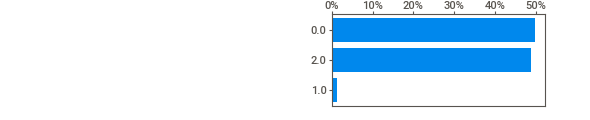
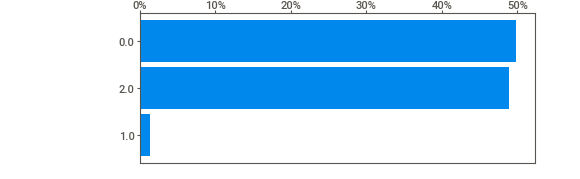
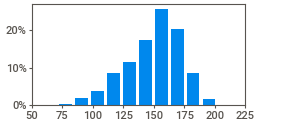
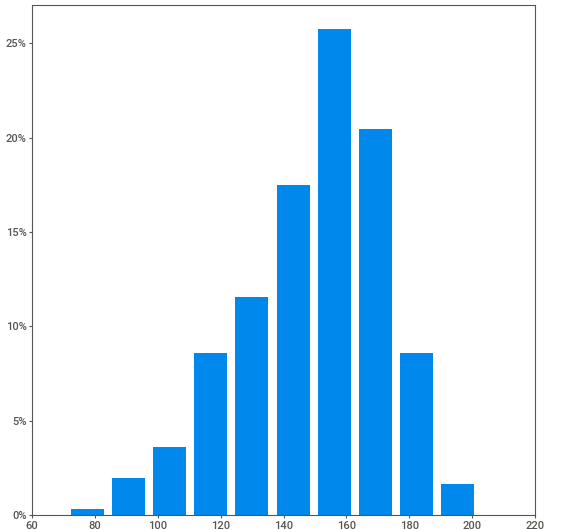
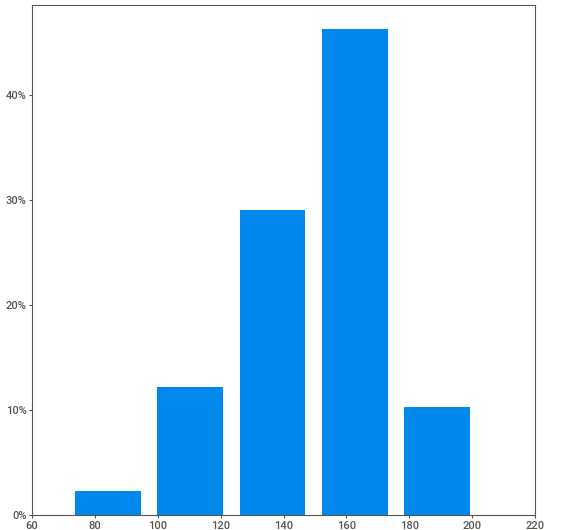
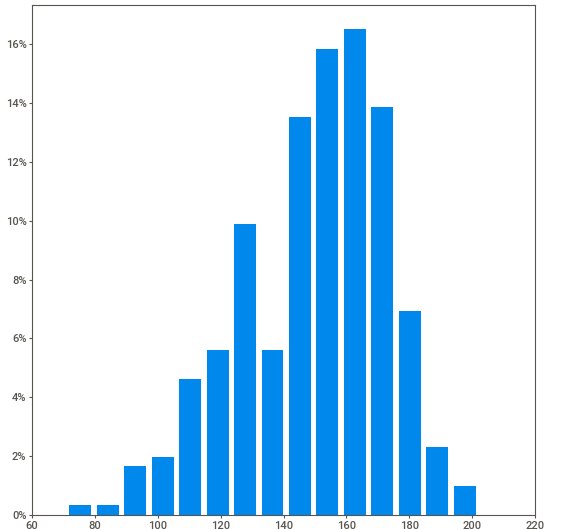
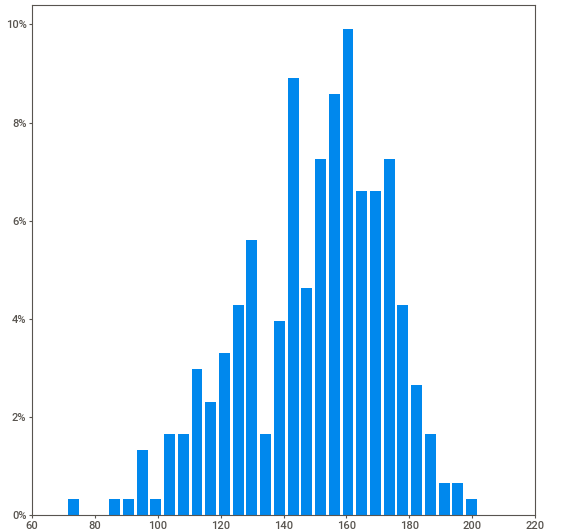
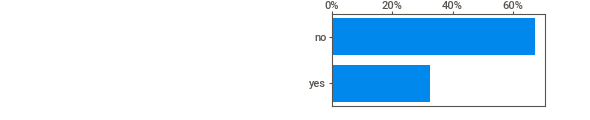
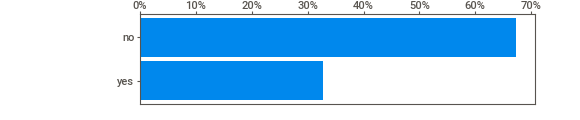
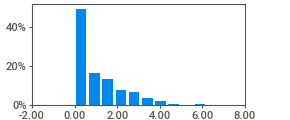
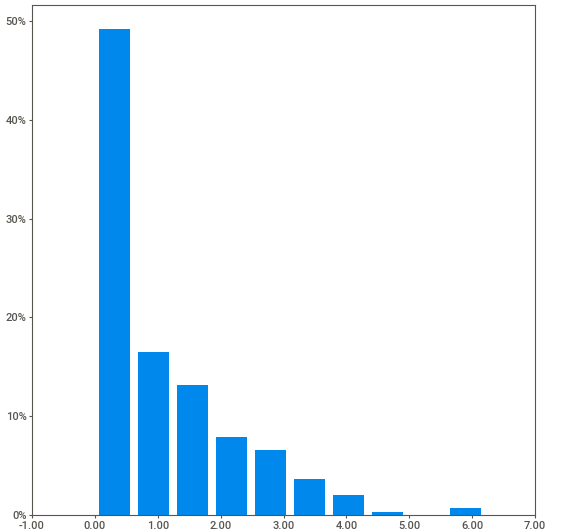
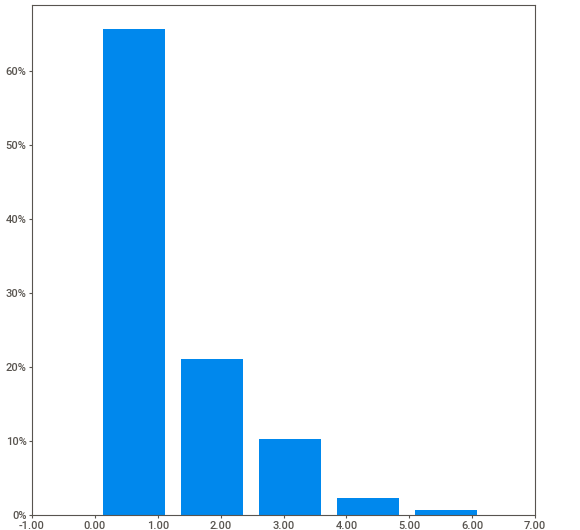
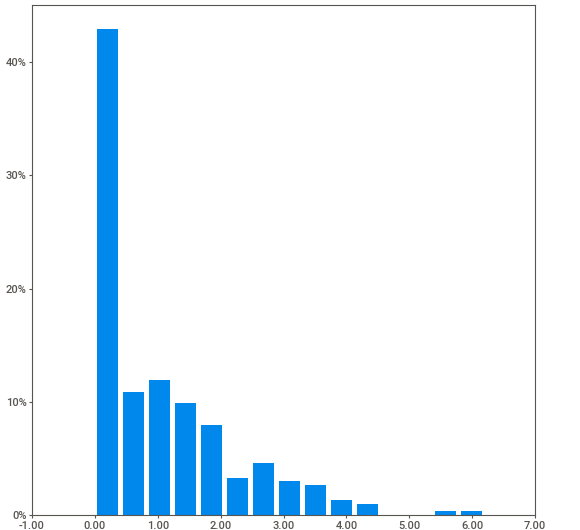
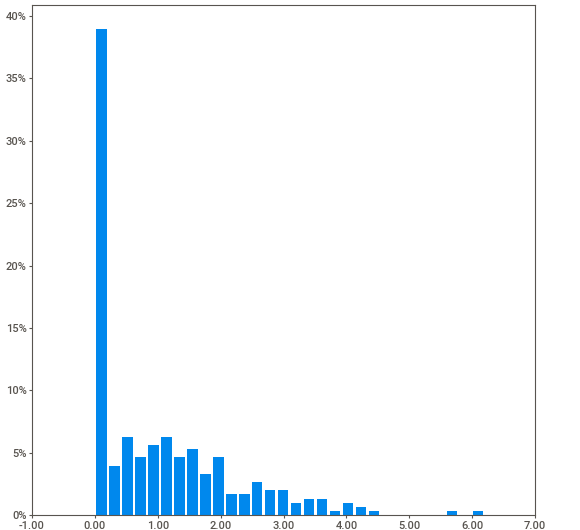
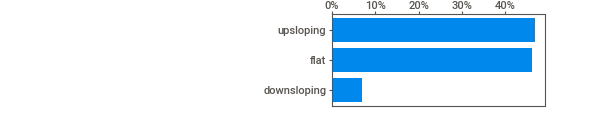
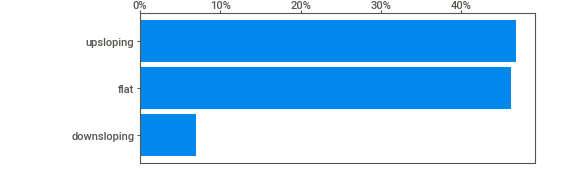
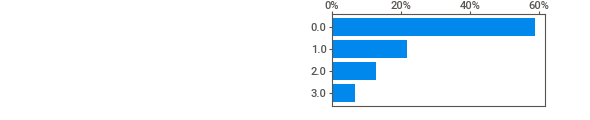
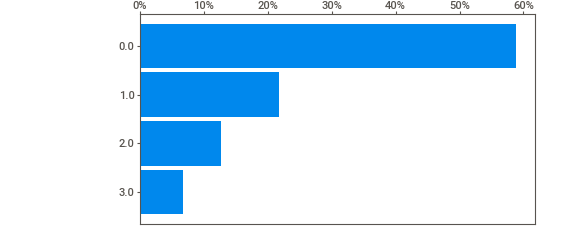
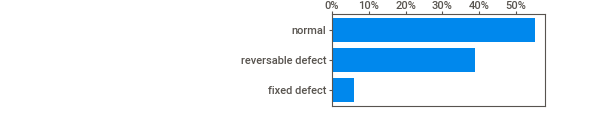
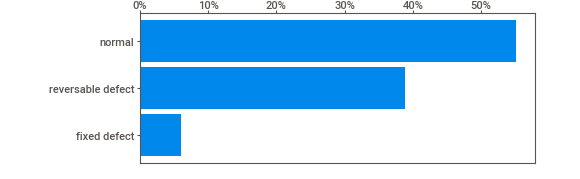
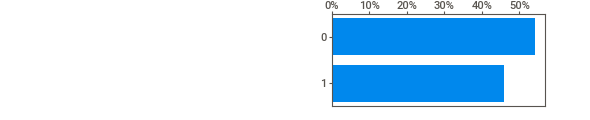
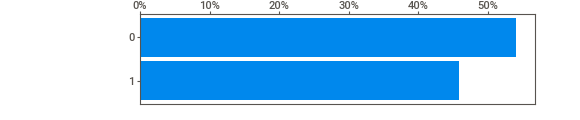
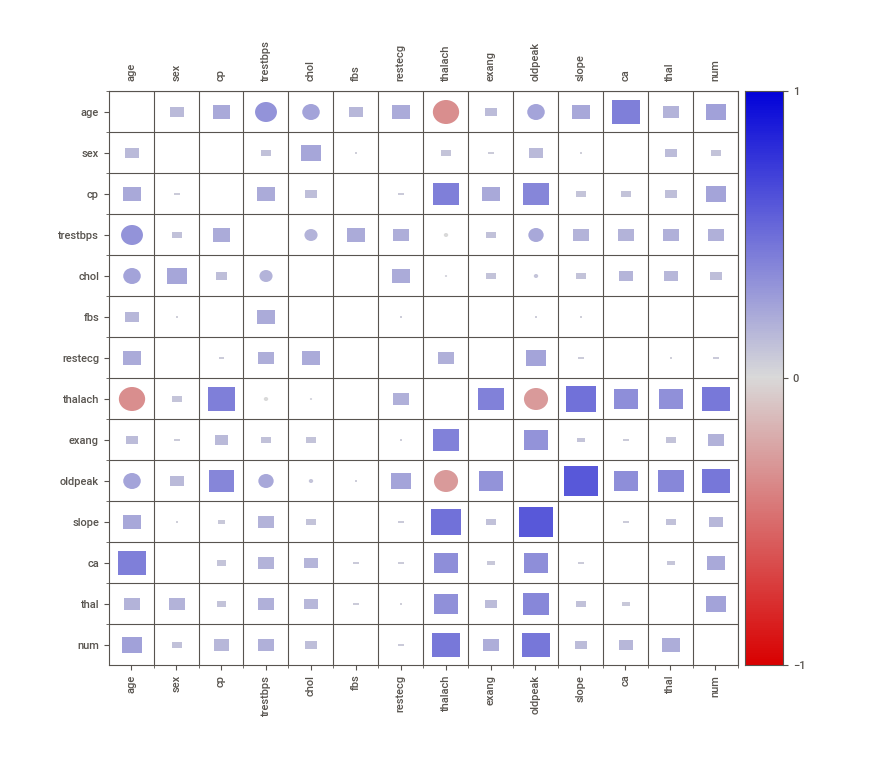
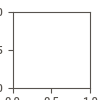

In [356]:
my_report.show_notebook(  w='100%', 
                h='Full', 
                scale=0.8,
                layout='widescreen')

## EDA Results

In [44]:
numeric_features_final = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
nominal_features_final = ['sex', 'cp', 'exang', 'slope', 'thal', 'fbs', 'restecg']
ordinal_features_final = ['ca']

### Nominal Features

* Apply OneHot Encoder 

### Ordinal Features

* Apply Oridinal Encoder

### Numeric Features

* Try Power Transformer with Normalizer
* Try Power Transformer with Robust scaler

### Experiment with

* PCA + RFECV
* Outlier + PCA + RFECV